# Logistic Regression

- skip_exec: true


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression

np.random.seed(42)

plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0


Regression models predict a continuous variable, such as rainfall amount or sunlight intensity. They can also predict probabilities, such as the probability that an image contains a cat. A probability-predicting regression model can be used as part of a classifier by imposing a decision rule - for example, if the probability is 50% or more, decide it's a cat.

Logistic regression predicts probabilities, and is therefore a regression algorithm. However, it is commonly described as a classification method in the machine learning literature, because it can be (and is often) used to make classifiers. There are also "true" classification algorithms, such as SVMs, which only predict an outcome and do not provide a probability.


### High level usage using Scikit-Learn


The easiest way of training a logistic regression is probably with the Scikit-Learn library.


In [ ]:
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([0, 0, 0, 1, 1])

model = LogisticRegression(random_state=0, solver="lbfgs")
model.fit(X, y)


LogisticRegression(random_state=0)

In [ ]:
model.predict_proba(X)[:, 1]


array([0.06291067, 0.16055632, 0.352715  , 0.60822136, 0.81559901])

In [ ]:
model.predict(X)


array([0, 0, 0, 1, 1])

## Logistic regression from scratch


### Odds and Odds Ratio


Understanding logsitic regression begins with probability.

The `probability` of an event is defined as:

$$
P(A) = \frac{Number\ of\ ways\ event\ A\ can\ occur}{Total\ number\ of\ possible\ outcomes}
$$

For example:

$$
\begin{align*}
P(Heads) &= \frac{1}{2} \\
\\
P(1\ or\ 2) &= \frac{2}{6} = \frac{1}{3} \\
\\
P(diamond\ card) &= \frac{13}{52} = \frac{1}{4}
\end{align*}
$$

The `odds` of an event is defined as:

$$
\begin{align*}
odds &= \frac{P(occurring)}{P(not\ occurring)} = \frac{p}{1 - p}
\end{align*}
$$

For example:

$$
\begin{align*}
odds(Heads) &= \frac{P(Heads)}{P(Tails)} &= \frac{\frac{1}{2}}{\frac{1}{2}} &= 1\ or\ 1:1 \\
\\
odds(1\ or\ 2) &= \frac{P(1\ or\ 2)}{P(3\ or\ 4\ or\ 5\ or\ 6)} &= \frac{\frac{1}{3}}{\frac{2}{3}} &= \frac{1}{2}\ or\ 1:2 \\
\\
odds(diamond\ card) &= \frac{P(diamond\ card)}{P(not\ diamond\ card)} &= \frac{\frac{1}{4}}{\frac{3}{4}}& = \frac{1}{3}\ or\ 1:3
\end{align*}
$$


### Bernoulli Distribution


The dependent variable in logistic regression follows the Bernoulli distribution having an unknown probability $p$.

The Bernoulli distribution is a special case of the Binomial distribution where $n = 1$ (in other words where there is just 1 trial).

Success is 1 and failure is 0.

The probability of success is $p$ and the probability of failure is $q$. So $q = 1 - p$.

In logistic regression we are estimating an unknown $p$ for any given linear combination of the independent variables.

We therefore need to link our inpedendent variables to the Bernoulli distribution. That link is called the logit.

In logistic regression we do not know $p$ like we do in Bernoulli (and more broadly Binomial) distribution problems. The goal of logistic regression is to estimate $p$ for any given linear combination of the independent variables. The estimate of $p$ is called $\hat{p}$.

To tie our linear combination of variables to the Bernoulli distribution we need a function that maps the linear combination of variables that could result in any given value on to the Bernoulli probability distribution with a domain from 0 to 1. The natural log of the odds, the logit, is that function. This can be written a few ways:

$$
\begin{align*}
ln(odds) &= ln(\frac{p}{1 - p})\ \text{or}\ ln(p) - ln(1 - p)\ \text{or}\ logit(p)
\end{align*}
$$

Note also that $ln(x) = log_e(x)$.

On a graph this looks like:


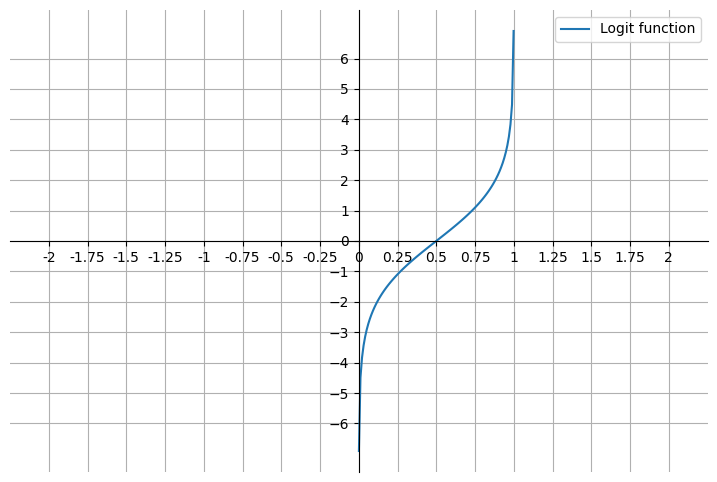

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

p = np.linspace(0.001, 0.999, 100)
y = np.log(p / (1 - p))

ax.plot(p, y, label="Logit function")

ax.set_xlim(-2.25, 2.25)
ax.set_xticks(np.arange(-2, 2.1, 0.25))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}".rstrip("0").rstrip(".")))

ax.set_yticks(np.arange(-6, 6.1, 1))

ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.legend()
ax.grid()
plt.show()

This is close to what we want. However, the probabilities are currently on the x-axis. We want the probabilities to be on the y-axis. We can do this by inverting the function. We begin by remembering that the logit function is equivalent to a linear combination of the independent variables and their coefficients. We define this linear combination as:

$$
z = \beta_0 + \beta_1x_1 + ... + \beta_kx_k
$$

where $x_1$ to $x_k$ are the independent variables, and $\beta_0$ to $\beta_k$ are the coefficients.

$$
\begin{aligned}
ln(\frac{p}{1 - p}) &= z \\
\frac{p}{1 - p} &= e^z \\
p &= (1 - p)e^z \\
p &= e^z - pe^z \\
p + pe^z &= e^z \\
p(1 + e^z) &= e^z \\
p &= \frac{e^z}{1 + e^z}
\end{aligned}
$$

where $p$ is between 0 and 1.

On a graph it looks like this:


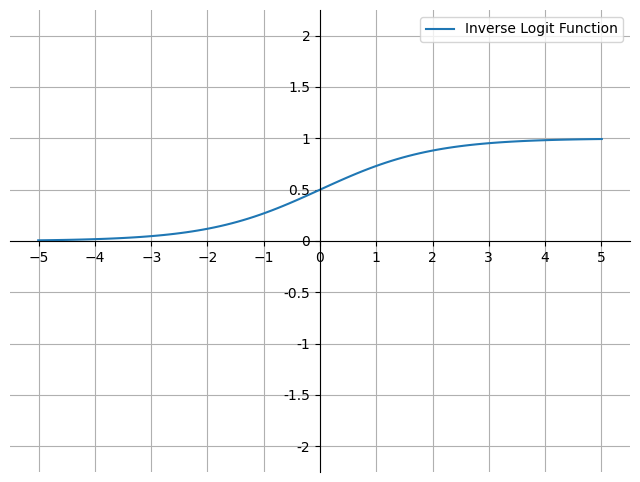

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

a = np.linspace(-5.01, 5.01, 100)
y = np.exp(a) / (1 + np.exp(a))

ax.plot(a, y, label="Inverse Logit Function")

ax.set_ylim(-2.25, 2.25)
ax.set_yticks(np.arange(-2, 2.1, 0.5))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}".rstrip("0").rstrip(".")))

ax.set_xticks(np.arange(-5, 6, 1))

ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.legend()
ax.grid()
plt.show()


This is known as the `sigmoid` or `logistic` function ($\sigma$), or the `estimated regression equation`. It is a non-linear function that maps real-valued inputs to the range $[0, 1]$. It is used in logistic regression to model the probability that an instance belongs to a particular class.


### Finding the coefficients with Maximum Likelihood Estimation (MLE)


For our model to be useful, we still need to find a good set off coefficents to substitute into our regression equation. The coefficients for logistic regression are often calculated using `maximum likelihood estimation (MLE)`.

The likelihood function is a product of individual probabilities for each observation in the data set.

$$
L(\boldsymbol{\beta}) = \prod_{i=1}^{n} p(\mathbf{x}_i)^{y_i} (1 - p(\mathbf{x}_i))^{1 - y_i}
$$

where:

- $L(\boldsymbol{\beta})$ is the vector of coefficients in the logistic regression model.
- $\mathbf{x}_i$ is the vector of features for observation $i$.
- $y_i$ is the outcome for observation $i$.
- $p(\mathbf{x}_i)$ is the predicted probability of the positive class for observation $i$, as given by the logistic function applied to $\mathbf{x}_i \cdot \boldsymbol{\beta}$.

Each of these probabilities is computed using the logistic function.

The goal of MLE in logistic regression is to find the set of parameters that maximises this likelihood function. This is typically done using iterative optimization algorithms such as gradient ascent (since we're maximizing a function) or its variants.

However, for reasons of numerical stability we generally work with the log-likelihood function instead of the likelihood function. The log-likelihood equation is:

$$
\log L(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left[ y_i \log p(\mathbf{x}_i) + (1 - y_i) \log (1 - p(\mathbf{x}_i)) \right]
$$


The derivative of the logistic function is:

$$\frac{d}{dz} \sigma(z) = \sigma(z) (1 - \sigma(z))$$


## Example


It's also very easy to train our own logistic regression model. The process is as follows:

1. Initialise the weights. This could be done randomly, or with zeros to make the model deterministic, or with some other method.
2. Calculate the output of the current version model, given the inputs and the weights.

   The line `scores = np.dot(X, weights)` performs the dot product of the input features `X` with the corresponding `weights`. In the context of logistic regression, this dot product is the weighted sum of the features for each sample in the dataset. The result of this operation is a score for each sample that indicates how strongly it belongs to the positive class.

   If `X` is a matrix where rows represent different samples and columns represent different features, and weights is a 1D array where each element corresponds to the weight of a feature, then `np.dot(X, weights)` will be a 1D array where each element is the weighted sum for a sample. That is, it represents the linear combination of the features for each sample.

   For instance:

   $$
   \begin{align}
   \begin{bmatrix}
   1 & 2 \\
   3 & 4 \\
   5 & 6
   \end{bmatrix}
   \cdot
   \begin{bmatrix}
   0.5 \\
   0.6
   \end{bmatrix}
   &= \begin{bmatrix}
   1 \cdot 0.5 + 2 \cdot 0.6 \\
   3 \cdot 0.5 + 4 \cdot 0.6 \\
   5 \cdot 0.5 + 6 \cdot 0.6
   \end{bmatrix} \\
   &= \begin{bmatrix}
   1.7 \\
   3.9 \\
   6.1
   \end{bmatrix}
   \end{align}
   $$

   This essentially projects the feature vectors onto the weights vector, resulting in a single scalar value (the "score") for each sample.

3. These scores are then passed through the `sigmoid` function to produce the predicted probability of the positive class for each sample.
4. We then update the weights using `maximum likelihood estimation`. This means:

   1. The predicted probabilities are subtracted from the actual labels to produce the error.
   2. We then calculate the gradient of the log-likelihood with respect to the weights.

      In order to perform this operation correctly, we need to multiply the `n x m` matrix `X` with the `n x 1` matrix `error` (where `n` is the number of observations and `m` is the number of features). However, the standard rules of matrix multiplication don't allow us to multiply these two matrices in this order, because the number of columns of the first matrix doesn't match the number of rows of the second matrix. So we transpose `X` into an `m x n` matrix `X.T` where the number of columns in `X.T` matches the number of rows in the `error` matrix. The result is an `m x 1` matrix, which represents the gradient of the log-likelihood with respect to each feature's weight.

      Or to put it another way, we have calculated the contribution of each feature to the error for each observation, and then summed these contributions over all observations.

   3. The weights are then updated by adding the gradient multiplied by the learning rate. The learning rate controls how much the weights are changed in response to the error. If the learning rate is too high, the weights will change too much and the model will not converge. If the learning rate is too low, the model will take a long time to converge.

Along the way we also calculate the negative log-likelihood to illustrate how well our model is converging.


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def predict_proba(x, weights):
    scores = np.dot(x, weights)
    return sigmoid(scores)


def negative_log_likelihood(X, y, weights):
    scores = np.dot(X, weights)
    log_likelihood = np.sum(y * scores - np.log(1 + np.exp(scores)))
    return -log_likelihood


def logistic_regression(X, y, num_steps: int, learning_rate: float, silent: bool = False):
    weights = np.zeros(X.shape[1])

    for step in range(num_steps):
        predicted_probabilities = predict_proba(X, weights)

        error = y - predicted_probabilities
        gradient = np.dot(X.T, error)
        weights += learning_rate * gradient

        if step % 100000 == 0:
            print(f"Negative log-likelihood at step {step}: {negative_log_likelihood(X, y, weights)}")

    return weights


We can then fit it like so:


In [ ]:
weights = logistic_regression(X, y, num_steps=1000000, learning_rate=5e-5)
print("Weights:", weights)

Negative log-likelihood at step 0: 3.465610934830976
Negative log-likelihood at step 100000: 1.6612460527415533
Negative log-likelihood at step 200000: 1.2058437634360355
Negative log-likelihood at step 300000: 0.9896429709538741
Negative log-likelihood at step 400000: 0.8576781489870338
Negative log-likelihood at step 500000: 0.766062385341013
Negative log-likelihood at step 600000: 0.697364426602992
Negative log-likelihood at step 700000: 0.6431658475892499
Negative log-likelihood at step 800000: 0.5988480247519807
Negative log-likelihood at step 900000: 0.5616385926438348
Weights: [-8.92141553  2.604058  ]


In [ ]:
predict_proba(X, weights)


array([0.00180145, 0.02381586, 0.24801232, 0.8168001 , 0.98367944])

Finally we can see that our from scratch model makes similar predictions to the `sklearn` model and that both sets of predictions are very close to the actual labels.


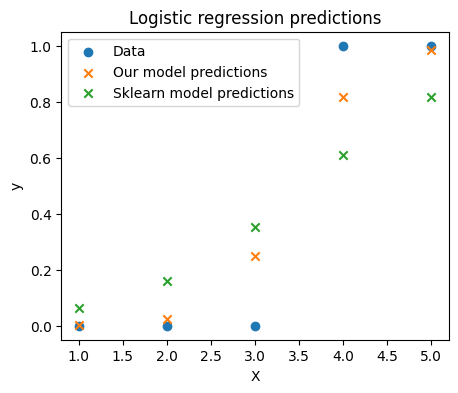

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(X[:, 1], y, color="C0", label="Data")
ax.scatter(X[:, 1], predict_proba(X, weights), color="C1", label="Our model predictions", marker="x")
ax.scatter(X[:, 1], model.predict_proba(X)[:, 1], color="C2", label="Sklearn model predictions", marker="x")
ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Logistic regression predictions")
plt.show()


## Why not use linear regression?


A linear model does not output probabilities. It treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimises the distances between the points and the hyperplane. Tt simply interpolates between the points, and you cannot interpret it as probabilities.

We can see it going wrong when it predicts values outside the range of 0 and 1. We can also how interpolation breaks when the x values are very large or very small. In contrast the logistic regression model remains reliable at each extreme.


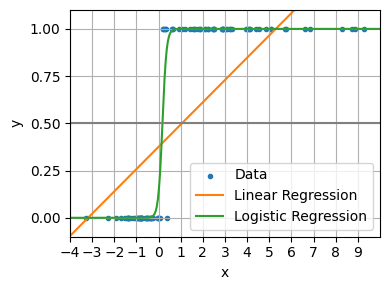

In [ ]:
n_samples = 100
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)

X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]

X_test = np.linspace(-5, 10, 300)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

log_reg = LogisticRegression(C=1e5)
log_reg.fit(X, y)

fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(X.ravel(), y, color="C0", label="Data", marker=".")
ax.plot(X_test, X_test * lin_reg.coef_ + lin_reg.intercept_, color="C1", label="Linear Regression")
ax.plot(X_test, sigmoid(X_test * log_reg.coef_ + log_reg.intercept_).ravel(), color="C2", label="Logistic Regression")

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_ylim(-0.1, 1.1)
ax.set_ylabel("y")
ax.set_xticks(range(-5, 10))
ax.set_xlim(-4, 10)
ax.set_xlabel("x")
ax.legend(loc="best")
ax.grid()
plt.axhline(0.5, color="0.5")
plt.tight_layout()
plt.show()

## Interpreting how a change in a feature affects the probability of the target being 1


### Odds Ratio


The `odds ratio` is a ratio of 2 odds.:

$$
\begin{align*}
odds\ ratio &= \frac{odds\ of\ event\ A}{odds\ of\ event\ B} \\
\end{align*}
$$

For example, suppose we have a loaded coin such that:

$$
\begin{align*}
P(Heads) &= \frac{7}{10} = 0.7 \\
odds(Heads) &= \frac{0.7}{1 - 0.7} ~= 2.333 \\
\end{align*}
$$

The odds ratio of this coin compared to a fair coin is:

$$
\begin{align*}
odds\ ratio = \frac{odds_1}{odds_0} = \frac{\frac{p_1}{1 - p_1}}{\frac{p_0}{1 - p_0}} = \frac{\frac{0.7}{1 - 0.7}}{\frac{0.5}{1 - 0.5}} = \frac{0.7}{0.3} \times \frac{0.5}{0.5} = \frac{0.35}{0.15} = 2.333
\end{align*}
$$

This is means the odds of getting heads with the loaded coin is 2.333 times greater than the odds of getting heads with a fair coin. (The odds and odds ratio are the same for tails in this example because the odds of heads with a fair coin is 1).

The odds ratio for a variable in logistic regression represents how the odds change for a 1 unit increase in that variable holding all other variables constant. To take a fictious example:

- Body weight and sleep apnea (2 categories: apnea / no apnea).
- Weight variable has an odds ratio of 1.07.
- This means that a 1 unit increase in weight increases the odds of having sleep apnea by 1.07
- A 10 pound increase in weight increases the odds of having sleep apnea to $1.07^{10} = 1.967$. It almost doubles a person's odds of having sleep apnea.
- This holds true at any point on the weight spectrum.
